# Plot Density Profiles from DFT Calculations

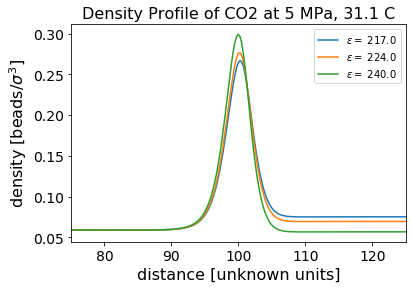

In [8]:
import numpy as np
import matplotlib.pyplot as plt

dft_pred_folder = '../../../Wang/dft_string_method/bi_surf/3k2f_60c_sensitivity/'


sub_folder_list = #['epsn_217-0/', 'epsn_224-0/', 'epsn_240-0/']

fig = plt.figure()
ax = fig.add_subplot(111)
    
for sub_folder in sub_folder_list:
    _, val_str = sub_folder.split('_')
    num, dec = val_str[:-1].split('-')
    epsn_val = float(num) + float(dec)/10**len(dec)
    data = np.genfromtxt(dft_pred_folder + sub_folder + 'rho0_4.dat')
    x = data[:,0]
    y = data[:,1]
    ax.plot(x,y, label=r'$\epsilon =$ ' + '{0:.1f}'.format(epsn_val))
    
    
ax.set_xlabel('distance [A]', fontsize=16)
ax.set_ylabel(r'density [beads/$\sigma^3$]', fontsize=16)
ax.set_title(r'Density Profile of CO2 at 5 MPa, 31.1 C', fontsize=16)
ax.tick_params(which='both', labelsize=14)
ax.set_xlim([75,125])
plt.legend()